特别是对于视觉，我们已经创建了一个叫做 totchvision 的包，该包含有支持加载类似Imagenet，CIFAR10，MNIST 等公共数据集的数据加载模块 torchvision.datasets 和支持加载图像数据数据转换模块 torch.utils.data.DataLoader。


对于本教程，我们将使用CIFAR10数据集，它包含十个类别：‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’, ‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’。CIFAR-10 中的图像尺寸为33232，也就是RGB的3层颜色通道，每层通道内的尺寸为32*32。

我们将按次序的做如下几步：  
使用torchvision加载并且归一化CIFAR10的训练和测试数据集  
定义一个卷积神经网络  
定义一个损失函数  
在训练样本数据上训练网络  
在测试样本数据上测试网络  

加载并归一化 CIFAR10 使用 torchvision ,用它来加载 CIFAR10 数据非常简单。

In [4]:
import torch 
import torchvision 
import torchvision.transforms as transforms

torchvision 数据集的输出是范围在[0,1]之间的 PILImage，我们将他们转换成归一化范围为[-1,1]之间的张量 Tensors。

In [5]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])


In [6]:
trainset = torchvision.datasets.CIFAR10(root='D:\JetBrains\pycharm\project\jupyternotebook\data\CIFAR',
                                        train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='D:\JetBrains\pycharm\project\jupyternotebook\data\CIFAR' ,
                                       train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Files already downloaded and verified
Files already downloaded and verified


In [7]:
import matplotlib.pyplot as plt

In [8]:
import numpy as np

In [12]:
def imshow(img):
    img = img /2+0.5
    npimg=img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.show()

In [13]:
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()


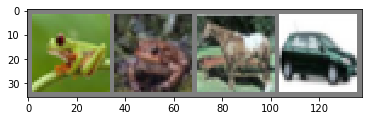

In [14]:
# show images
imshow(torchvision.utils.make_grid(images))

In [15]:
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))


 frog  frog horse   car


In [16]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [17]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [18]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.179
[1,  4000] loss: 1.847
[1,  6000] loss: 1.668
[1,  8000] loss: 1.561
[1, 10000] loss: 1.514
[1, 12000] loss: 1.469
[2,  2000] loss: 1.381
[2,  4000] loss: 1.377
[2,  6000] loss: 1.354
[2,  8000] loss: 1.351
[2, 10000] loss: 1.303
[2, 12000] loss: 1.277
Finished Training


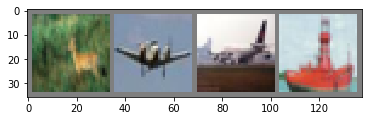

 deer plane plane  ship


In [19]:
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()
# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))


In [20]:
outputs=net(images)

In [21]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))


Predicted:   deer  ship plane  ship


In [26]:
outputs.data

tensor([[-2.9376, -3.7579,  1.0939,  3.9096,  1.4541,  3.1726,  3.7814,  1.3197,
         -4.1941, -4.0510],
        [-2.2100, -4.0315,  2.8980,  2.6257,  1.4049,  3.9619, -0.2753,  1.7129,
         -2.4482, -4.1430],
        [ 0.5310,  1.7411,  1.2931, -0.9905,  4.3797, -0.9253,  0.6384, -0.3356,
         -3.2300, -3.3141],
        [-1.0709, -2.2441,  0.4569,  0.2515,  3.3017,  1.1942, -0.4904,  5.9401,
         -4.3025, -3.0273]])

torch.max(input, dim, keepdim=False, out=None) -> (Tensor, LongTensor)

按维度dim 返回最大值

torch.max)(a,0) 返回每一列中最大值的那个元素，且返回索引（返回最大元素在这一列的行索引）

In [23]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 55 %


In [27]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))


Accuracy of plane : 46 %
Accuracy of   car : 78 %
Accuracy of  bird : 41 %
Accuracy of   cat : 52 %
Accuracy of  deer : 43 %
Accuracy of   dog : 34 %
Accuracy of  frog : 72 %
Accuracy of horse : 66 %
Accuracy of  ship : 80 %
Accuracy of truck : 43 %


## GPU

In [28]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assume that we are on a CUDA machine, then this should print a CUDA device:

print(device)

cpu


In [29]:
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [30]:
inputs, labels = inputs.to(device), labels.to(device)

In [31]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [33]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        inputs=inputs.to(device)
        labels=labels.to(device)
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.230
[1,  4000] loss: 1.228
[1,  6000] loss: 1.218
[1,  8000] loss: 1.188
[1, 10000] loss: 1.189
[1, 12000] loss: 1.181
[2,  2000] loss: 1.087
[2,  4000] loss: 1.107
[2,  6000] loss: 1.107
[2,  8000] loss: 1.092
[2, 10000] loss: 1.136
[2, 12000] loss: 1.121
Finished Training
